# 차원 축소(Dimension Reduction)

PCA, LDA, SVD, NMF

<p align="center"><img src="./dimension reduction.jpg"></p>

## 종류

**피처 선택**(feature selection): (데이터 특징을 잘 나타내는) <span style="color: #2D3748; background-color:#fff5b1;">**주요 피처만 선택**</span>하는 것  
**피처 추출**(feature extraction): 저차원의 중요 피처로 압축해서 추출하는 것  
    ㄴ> <span style="color: #2D3748; background-color:#fff5b1;">**함축적인 특성 추출**</span>이란?<br>
        전혀 인지하기 어려웠던(좀 더 데이터를 잘 설명할 수 있는) <span style="color: #2D3748; background-color:#fff5b1;">**잠재적인**</span> 요소를 추출하는 것  
    ㄴ> **대표적인 차원 축소 알고리즘** : PCA, SVD, NMF<br>
    ㄴ> 시맨틱 토픽(Semantic Topic) 모델링을 위한 기반 알고리즘으로 사용되는 것은 SVD, NMF 임

## PCA(Principal Component Analysis, 주성분 분석)

PCA 수행 절차  
  
1. 기존 데이터 X의 공분산행렬 계산  
2. 공분산행렬의 고유값과 고유벡터 계산  
3. 고유값의 크기 순서대로 고유벡터를 나열  
4. 정렬된 고유벡터 가운데 일부 선택  
5. 해당 고유벡터와 X 내적

### 적용하기 - 붓꽃 데이터

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# 데이터 로드
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [49]:
# numpy dataset을 pandas dataframe으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(iris.data, columns = columns)
iris_df[:3]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [50]:
iris_df['target'] = iris.target
iris_df[:3]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [51]:
iris.data.shape

(150, 4)

> 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화해보기

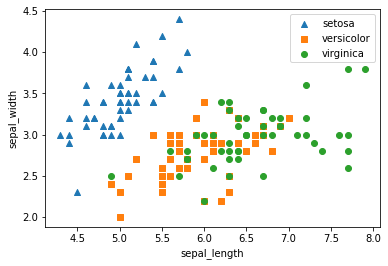

In [57]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양을 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target'] == i]['sepal_length']
    y_axis_data = iris_df[iris_df['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

> PCA로 4개 속성을 2개로 압축한 뒤, 2개의 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화하기

In [60]:
from sklearn.preprocessing import StandardScaler

# target 값을 제외한 모든 속성 값을 standardscaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])

> 스케일링된 데이터 세트에 PCA 적용하기

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # n_components 는 pca로 변환할 차원의 수를 의미

In [64]:
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)
iris_pca

(150, 2)


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

> dataframe으로 변환한 뒤 데이터 값 확인하기

In [66]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']

iris_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_pca['target'] = iris.target
iris_pca[:3]

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


> 2차원상에서 시각화해보기

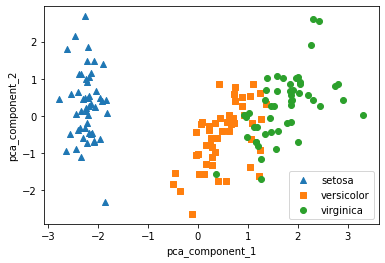

In [70]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = iris_pca[iris_pca['target'] == i]['pca_component_1']
    y_axis_data = iris_pca[iris_pca['target'] == i]['pca_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
                                                    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [76]:
pca.explained_variance_ratio_ # PCA Component별로 원본 데이터와의 변동성 비율을 보여줌

array([0.72962445, 0.22850762])

=> 첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9%를 차지하며,  두 번째인 pca_component_2가 약 22.8%를 차지함을 알 수 있음

### 분류 적용 vs PCA 적용

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv = 3)

In [79]:
scores # 원본 데이터 교차 검증 개별 정확도

array([0.98, 0.94, 0.96])

In [80]:
np.mean(scores) # 원본 데이터 평균 정확도

0.96

> 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트를 랜덤 포레스트 적용해보기

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

In [12]:
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [13]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [15]:
rf_clf = RandomForestClassifier(random_state = 156)
cross_val_score(rf_clf, X_pca, y, scoring = 'accuracy', cv= 3)

array([0.88, 0.88, 0.88])

In [16]:
rf_clf = RandomForestClassifier(random_state = 156)
cross_val_score(rf_clf, X_scaled, y, scoring = 'accuracy', cv= 3)

array([0.98, 0.94, 0.96])

### 신용카드 고객 데이터 세트에 적용해보기

In [28]:
df = pd.read_csv('./data/credit_cards_dataset.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [29]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [25]:
# cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
# cols_bill

In [31]:
df_backup = df.copy()
df = df.iloc[:, 12:18]

> 스케일링 -> PCA 변환 -> Logistic Regression로 분류(cv = 5)  

In [34]:
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(df_backup, df)

In [39]:
pca = PCA(n_components = 2)
pca.fit_transform(df_cols_scaled)
pca.explained_variance_ratio_

array([0.26207492, 0.16812731])

> 스케일링 PCA 이전의 데이터에 대하여 Logstic Regression로 분류해보기(cv = 5)

## LDA(Linear Discriminant Analysis)

입력 데이터의 결정 값 클래스를 **최대한으로 분리**할 수 있는 축을 찾아, 개별 클래스를 분별할 수 있는 기준을 **최대한 유지**하면서 차원을 축소

### 적용하기 - 붓꽃 데이터

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X_scaled = StandardScaler().fit_transform(X)

In [87]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(X_scaled, y)
iris_lda = lda.transform(X_scaled)
iris_lda.shape

(150, 2)

## SVD(Singular Value Decomposition)

TruncatedSVD 클래스로 구현

In [88]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
X = iris.data
y = iris.target
X_scaled = StandardScaler().fit_transform(X)

In [89]:
tsvd = TruncatedSVD(n_components = 2)
iris_tsvd = tsvd.fit_transform(X_scaled)

In [90]:
iris_tsvd

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

Text(0, 0.5, 'TruncatedSVD Component 2')

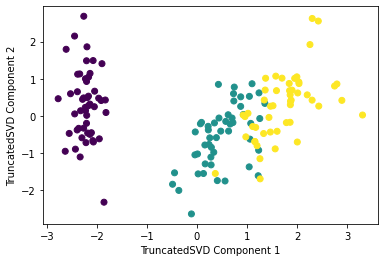

In [92]:
plt.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = y)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

## NMF(Non-Negative Matrix Factorization)